# Dimensionality Reduction Using PCA

- It is a technique used to reduce the number of features in a dataset while preserving as mu ch information as possible.
- Advantages:
    - Improving computational efficiency: Having less features can improve the speed of the ML algorithm
    - Visualizing The Data: Multi-dimensional data is hard or impossible to visualize in one plot. Dimensionality Reduction can summarize all the features into 2 features (X and Y axes)
    - Reducing noise: by reducing the complexity and detailed information
    - Improving model performance: minimizing overfitting
- Types:
    - PCA (Principal Component Analysis) 
        - It looks for a new set of features that are linear combinations of the original features
        - These features are called **Principal Components**
        - The first component captures the most variance in the data and the second component captures the second level of variance and so on...
    - t-SNE (t-distributed Stochastic Neighbor Embedding)
        - It is a non-linear dimensionality reduction 
        - It helps with the local structure of the data
    - UMAP
        - Similar to t-SNE, but faster
    - Autoencoders
        - They are neural networks that are trained to reconstruct the data
        - They are becoming popular as they are used in Transform architecture for GenAI

- When to avoid PCA:
    - When the variance analysis yields lower score for the principal components (we'll explore that later)
    - When the number of features is already low
    - When the data is not close to normal distribution or high volume of outliers

> It's highly recommended to scale/standardize your data before applying PCA

## PCA

![PCA](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# integrate the data elements into a df
X = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> NOTE: It's highly recommended to standardize the data before performing PCA.

### Step 1: Standardize The Data

In [5]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

### Step 2: Apply PCA

In [6]:
X_scaled.shape

(569, 30)

We're going to reduce the number of features fro 30 to 2

In [7]:
# define the number of comp = 2
pca_model_2 = PCA(n_components=2)

In [8]:
X_scaled_2_pca = pca_model_2.fit_transform(X_scaled)

In [9]:
X_scaled_2_pca.shape

(569, 2)

In [9]:
X_scaled_2_pca[:4]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

In [10]:
print('Before PCA:\t', X_scaled.shape[1], 'dimensions')
print('After PCA:\t', X_scaled_2_pca.shape[1], 'dimensions')

Before PCA:	 30 dimensions
After PCA:	 2 dimensions


### PCA Explained Variance Analysis

- The Explained Variance Analysis helps choose the optimal number of Principal Components for Dimensionality Reduction
- Steps:
    1. Build PCA for max number of components (the original number of features)
    2. Fit the data
    3. Calculate the cumulative sum (running total) of the **Explained Variance Ratio (EVR) **
    4. Plot the result
    5. Choose the optimal value where the curve is closer to 1 and starts to flatten.

In [11]:
#step 1
pca_model_full = PCA()

#step 2
pca_model_full.fit(X_scaled)

#step 3
pca_evr = pca_model_full.explained_variance_ratio_
pca_evr_cumsum = np.cumsum(pca_evr)

Tabular Evaluation

In [12]:
df_pca_evr = pd.DataFrame({'PrincipalComponent': range(1,31),
                           'PrincipalComponentEVR':pca_evr,
                            'PrincipalComponentCumSumEVR': pca_evr_cumsum})
df_pca_evr

,PrincipalComponent,PrincipalComponentEVR,PrincipalComponentCumSumEVR
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343
5,6,0.040245,0.887588
6,7,0.022507,0.910095
7,8,0.015887,0.925983
8,9,0.013896,0.939879
9,10,0.011690,0.951569


Visual Evaluation

In [31]:
plt.style.use('seaborn-v0_8')


Text(0, 0.5, 'Explained Variance Ratio (CumSum)')

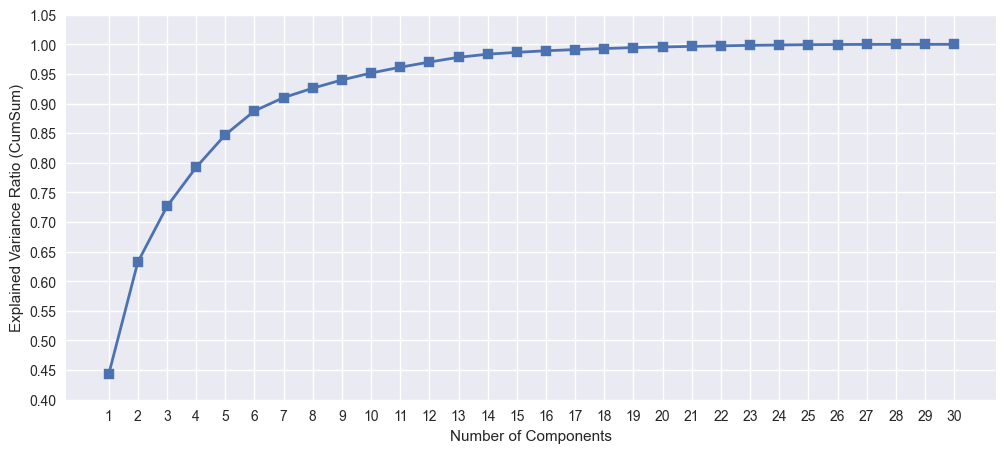

In [52]:
plt.figure(figsize=(12,5))

plt.plot(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentCumSumEVR'], linewidth=2)
plt.scatter(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentCumSumEVR'], marker='s')

plt.xticks(df_pca_evr['PrincipalComponent'])
plt.yticks(np.arange(0.4,1.1,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (CumSum)')

Text(0, 0.5, 'Explained Variance Ratio')

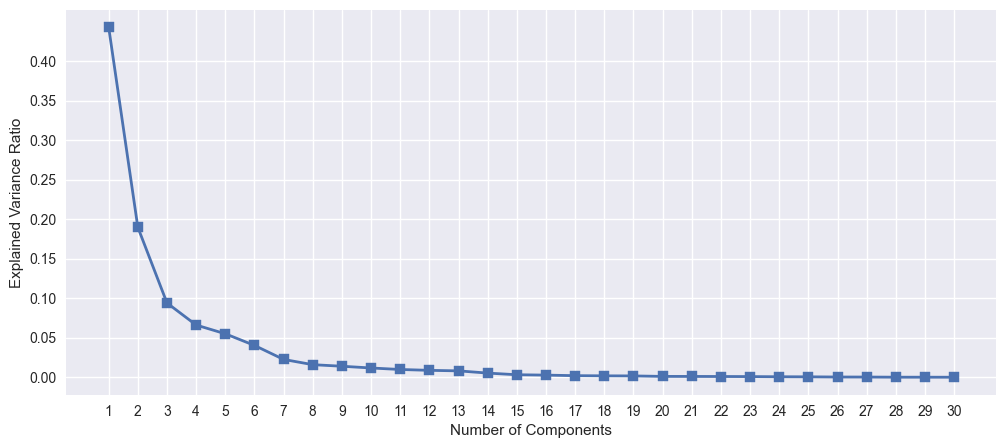

In [53]:
plt.figure(figsize=(12,5))

plt.plot(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentEVR'], linewidth=2)
plt.scatter(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentEVR'], marker='s')

plt.xticks(df_pca_evr['PrincipalComponent'])
plt.yticks(np.arange(0,.45,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

- The analysis above shows that as we increase the number of PC, we get better EVR (closer to 1 or 100% explained variance)
- Choosing the best numberof PCs depends on multiple factors with trade-offs: 
    - **High EVR vs Less Number of Components for better performance**
    - Less Variance doesn't always mean bad PCA because sometimes it reduces the noise in the data, which leads to reducing overfitting
    - The goal here is to get the highest number of variance possible with the lowest number of features for system performance optimization
- Suggested PCs count: 8 to 16
- Variance is small in later PCs, and that means there is more chance of overfitting

- 95% of the variance is captured with ~10 components
- PC from 18 and above, we have very insignificant loss of information
- The curve starts to flatten after PC 13
- Use Case:
    - If the goal is to build 2D visualization: 0.632432 of variance explained
    - If the goal is to have a trade off between reducing dimensions to improve performance vs avoiding big loss of info,  10 PCs will give us 0.951569 of the variance, which is a nice trade-off.

## Visualize PCA Results for 2 components

In [34]:
X_scaled_2_pca[:4] #top 4 rows of the 2-PC array

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

Text(0, 0.5, 'Second Principal Component')

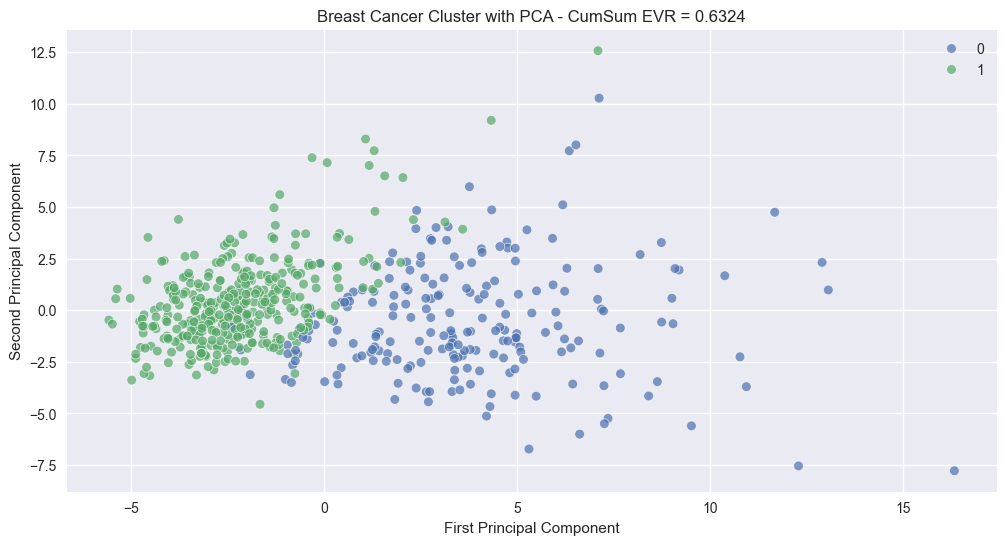

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_scaled_2_pca[:,0], y=X_scaled_2_pca[:,1], hue=cancer_data['target'], alpha=0.7) #using seaborn is easier than matplot

plt.title(f"Breast Cancer Cluster with PCA - CumSum EVR = {df_pca_evr['PrincipalComponentCumSumEVR'][1]:.4f}")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [36]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

First PC: 'mean radius', 'radius error', 'perimeter error'
Second PC: 'worst compactness', 'worst concavity'

## PCA Loadings

- They are used to understand the relationship between the original features in the dataset and the newly built PCs
- They help interpret how much each "original" feature contributes to each PC
- Loadings analysis generates the **Loadings Matrix**

In [37]:
# calculate the loadings
pca_2_loadings = pca_model_2.components_

print('Loadings of PC 1:\n',pca_2_loadings[0])
print('----')
print('Loadings of PC 2:\n',pca_2_loadings[1])

Loadings of PC 1:
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
----
Loadings of PC 2:
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [38]:
# build a loadings matrix

loadings_matrix = pd.DataFrame(pca_2_loadings, columns=X.columns).T
loadings_matrix.columns = ['PC1', 'PC2']
loadings_matrix

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


### Interpretation
#### PCA Loadings Interpretation for the Breast Cancer Dataset (Unsupervised)

The **loadings** represent how much each original feature contributes to the principal components (PC1 and PC2). A higher absolute value indicates a stronger influence of that feature on the corresponding component.

Here is a summary of the key insights from the PCA loadings:

##### **PC1 (First Principal Component)**:
- **Strongest positive contributors**:
  - **mean concave points** (0.260)
  - **mean concavity** (0.258)
  - **worst concave points** (0.251)
  - **mean compactness** (0.239)
  - **worst perimeter** (0.237)

These features are strongly correlated with PC1, indicating they contribute most to the variance captured by this component. This suggests that the **shape-related features** (e.g., concavity, concave points, perimeter, and compactness) are crucial in explaining the variance in the dataset.

##### **PC2 (Second Principal Component)**:
- **Strongest positive contributors**:
  - **fractal dimension (mean)** (0.367)
  - **fractal dimension error** (0.280)
  - **worst fractal dimension** (0.275)

The second component is influenced by the **fractal dimension-related features**, indicating that PC2 captures variability that is more aligned with the fractal dimension of the tumors, which likely provides a different aspect of tumor structure not fully explained by PC1.

#### How to Interpret This:
1. **PC1** seems to capture the **size and shape** characteristics of tumors, focusing on features like **concavity**, **concave points**, and **perimeter**. Tumors with high values in these features likely correspond to more complex shapes.
   
2. **PC2** appears to focus on the **roughness and irregularity** of the tumors, particularly driven by the fractal dimension. This component might capture variance related to the irregularity of the tumor’s boundary.

#### Next Steps for Analysis:
- **Visualization**: You can plot the principal components to visualize how the data points (tumors) cluster based on the first two principal components.
- **Feature Reduction**: By focusing on features with the highest loadings, you could reduce the number of features used in further analysis.
  
Would you like me to generate a plot to visualize the results of this PCA?

In [39]:
loadings_matrix.max()

PC1    0.260854
PC2    0.366575
dtype: float64

In [40]:
# Get the highest 3 values of loadings for each component
top_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(3).index, axis=0)

# Add the corresponding values
top_values = loadings_matrix.apply(lambda x: x.nlargest(3).values, axis=0)


In [41]:
top_loadings

,PC1,PC2
0,mean concave points,mean fractal dimension
1,mean concavity,fractal dimension error
2,worst concave points,worst fractal dimension


In [42]:
top_values

,PC1,PC2
0,0.260854,0.366575
1,0.258400,0.280092
2,0.250886,0.275339


#### Interpretation
With these PCA loadings, you can interpret PC1 (First Principal Component) as follows:
- PC1 captures a shape complexity and size dimension:
- The strongest positive contributors to PC1 are features related to:
    - Concavity: Mean concave points, mean concavity, and worst concave points suggest that PC1 captures the degree of concavity or "inward curvature" in the shapes.
    - Compactness: Mean compactness indicates that PC1 also relates to how compact or "rounded" the shapes are.
    - Size: Worst perimeter suggests that PC1 is also associated with the size of the shapes, with larger perimeters indicating larger shapes.
- Interpretation:
    - Samples with high PC1 scores likely have:
        - More complex shapes with higher concavity
        - Less compact shapes
        - Larger sizes
    - Conversely, samples with low PC1 scores likely have:
        - Simpler shapes with lower concavity
        - More compact shapes
        - Smaller sizes
- Contextualizing in breast cancer diagnosis:
In the context of breast cancer diagnosis, PC1 might be capturing characteristics of tumors that are more aggressive or malignant, such as:
Irregular shapes with high concavity
Larger sizes
This interpretation can help you understand the underlying structure of the data and how the features relate to each other. You can further explore the relationships between PC1 and other principal components, as well as the target variable (benign/malignant), to gain more insights.
Meta AI Response: With these PCA loadings, you can interpret PC1 (First Principal Component) as follows: PC1 captures a shape complexity and size dimension: The strongest positive contributors to PC1 are features related to: Concavity: Mean concave points, mean concavity, and worst concave points suggest that PC1 captures the degree of concavity or "inward curvature" in the shapes. Compactness: Mean compactness indicates that PC1 also relates to how compact or "rounded" the shapes are. Size: Worst perimeter suggests that PC1 is also associated with the size of the shapes, with larger perimeters indicating larger shapes. Interpretation: Samples with high PC1 scores likely have: More complex shapes with higher concavity Less compact shapes Larger sizes Conversely, samples with low PC1 scores likely have: Simpler shapes with lower concavity More compact shapes Smaller sizes Contextualizing in breast cancer diagnosis: In the context of breast cancer diagnosis, PC1 might be capturing characteristics of tumors that are more aggressive or malignant, such as: Irregular shapes with high concavity Larger sizes This interpretation can help you understand the underlying structure of the data and how the features relate to each other. You can further explore the relationships between PC1 and other principal components, as well as the target variable (benign/malignant), to gain more insights.

In [44]:
# Format DataFrame for Table Display
df_loadings = top_values.stack().reset_index()
df_loadings.columns = ['Feature', 'Principal Component', 'Loading']
df_loadings = df_loadings.pivot(index='Feature', columns='Principal Component', values='Loading')
df_loadings

Principal Component,PC1,PC2
Feature,,
0,0.260854,0.366575
1,0.258400,0.280092
2,0.250886,0.275339


In [45]:
top_loadings = np.argsort(np.abs(pca_2_loadings), axis=1)[:, -3:]

top_features = []
for i in range(2):
    features = [X.columns[j] for j in top_loadings[i]]
    values = np.round(pca_2_loadings[i, top_loadings[i]],3)
#    top_features = pd.DataFrame({'Feature': features, 'Value': values})
    top_features.append(pd.DataFrame({'Feature': features, 'Value': values}))


In [46]:
top_loadings

array([[27,  6,  7],
       [29, 19,  9]])

In [47]:
top_features

[                Feature  Value
 0  worst concave points  0.251
 1        mean concavity  0.258
 2   mean concave points  0.261,
                    Feature  Value
 0  worst fractal dimension  0.275
 1  fractal dimension error  0.280
 2   mean fractal dimension  0.367]

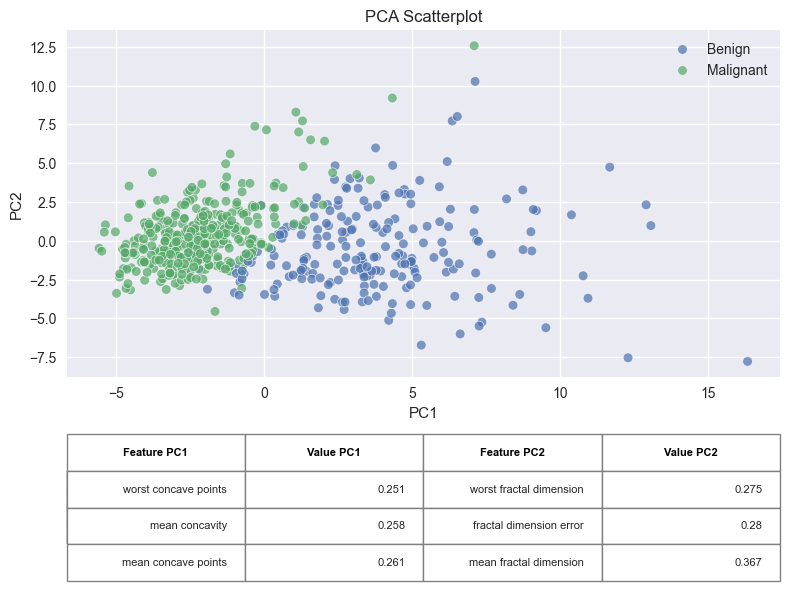

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

# Scatterplot
sns.scatterplot(x=X_scaled_2_pca[:,0], y=X_scaled_2_pca[:,1], hue=np.where(cancer_data['target']==0,'Benign', 'Malignant'), alpha=0.7, ax=axs[0])
axs[0].set_title('PCA Scatterplot')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')


# Table
table_data = pd.concat([top_features[0], top_features[1]], axis=1)
table_data.columns = ['Feature PC1', 'Value PC1', 'Feature PC2', 'Value PC2']
axs[1].axis('off')
axs[1].table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

# Format table --can be skipped
table = axs[1].table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
table.set_fontsize(12)
table.scale(1, 2)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='black')
    cell.set_linewidth(1)
    cell.set_edgecolor('gray')

plt.tight_layout()


In [57]:
from mpl_toolkits.mplot3d import Axes3D


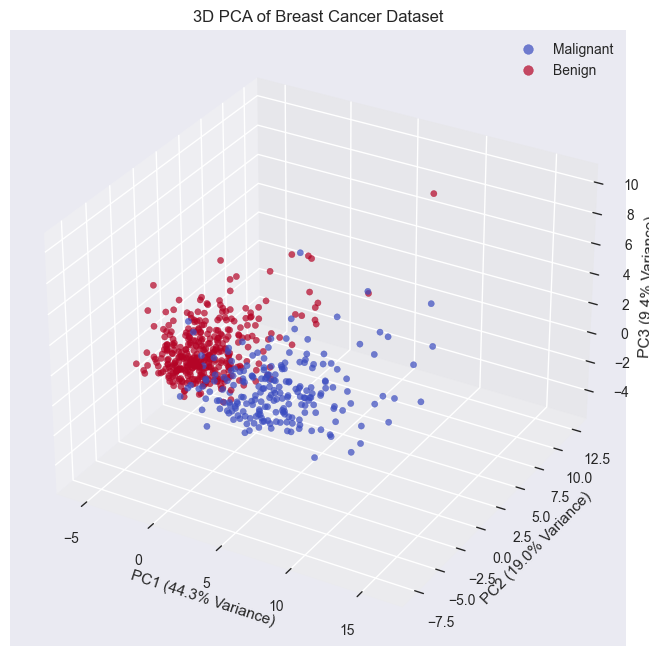

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA (Reduce to 3 Components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = cancer_data['target']

# 3D Visualization
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                      c=pca_df['target'], cmap='coolwarm', alpha=0.7)

# Labels and Title
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}% Variance)')
ax.set_title('3D PCA of Breast Cancer Dataset')

# Legend
legend_labels = ['Malignant', 'Benign']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc="best")

plt.show()
